In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os
from config import bls_key
import json

In [2]:
#import natl employment rate 2008-2018 (people over 16 years old)
unemploy_filepath=os.path.join('Resources','natl_unemploy_data.csv')
natl_unemploy=pd.read_csv(unemploy_filepath,index_col='Year')
natl_unemploy

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
2008,5.0,4.9,5.1,5.0,5.4,5.6,5.8,6.1,6.1,6.5,6.8,7.3
2009,7.8,8.3,8.7,9.0,9.4,9.5,9.5,9.6,9.8,10.0,9.9,9.9
2010,9.8,9.8,9.9,9.9,9.6,9.4,9.4,9.5,9.5,9.4,9.8,9.3
2011,9.1,9.0,9.0,9.1,9.0,9.1,9.0,9.0,9.0,8.8,8.6,8.5
2012,8.3,8.3,8.2,8.2,8.2,8.2,8.2,8.1,7.8,7.8,7.7,7.9
2013,8.0,7.7,7.5,7.6,7.5,7.5,7.3,7.2,7.2,7.2,6.9,6.7
2014,6.6,6.7,6.7,6.2,6.3,6.1,6.2,6.1,5.9,5.7,5.8,5.6
2015,5.7,5.5,5.4,5.4,5.6,5.3,5.2,5.1,5.0,5.0,5.1,5.0
2016,4.9,4.9,5.0,5.0,4.8,4.9,4.8,4.9,5.0,4.9,4.7,4.7


In [3]:
#calculate annual mean
natl_mean=natl_unemploy.mean(axis=1)
natl_mean

Year
2008    5.800000
2009    9.283333
2010    9.608333
2011    8.933333
2012    8.075000
2013    7.358333
2014    6.158333
2015    5.275000
2016    4.875000
2017    4.350000
2018    3.891667
dtype: float64

In [4]:
#import natl employment rate 2008-2018 for over 25 year olds with bachelors degrees
over25_filepath=os.path.join('Resources','over25_bs_unemploy_data.csv')
over25_unemploy=pd.read_csv(over25_filepath,index_col='Year')
over25_unemploy

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
2008,2.1,2.0,2.1,2.1,2.2,2.4,2.5,2.8,2.6,3.1,3.2,3.6
2009,3.9,4.1,4.3,4.4,4.8,4.8,4.8,4.8,5.0,4.7,4.8,4.9
2010,4.9,4.9,4.9,4.8,4.6,4.4,4.5,4.6,4.5,4.6,5.0,4.8
2011,4.3,4.3,4.4,4.5,4.5,4.3,4.2,4.2,4.2,4.3,4.4,4.1
2012,4.3,4.2,4.1,4.0,3.9,4.0,4.1,4.1,4.0,3.7,3.9,4.0
2013,3.8,3.9,3.8,3.9,3.9,3.8,3.8,3.4,3.7,3.7,3.4,3.3
2014,3.3,3.4,3.4,3.3,3.2,3.3,3.1,3.2,2.9,3.0,3.2,2.8
2015,2.8,2.7,2.4,2.7,2.8,2.5,2.5,2.4,2.5,2.5,2.6,2.5
2016,2.5,2.5,2.6,2.4,2.5,2.5,2.5,2.6,2.5,2.6,2.4,2.5


In [5]:
#calculate over 25 mena
over25_mean=over25_unemploy.mean(axis=1)
over25_mean

Year
2008    2.558333
2009    4.608333
2010    4.708333
2011    4.308333
2012    4.025000
2013    3.700000
2014    3.175000
2015    2.575000
2016    2.508333
2017    2.300000
2018    2.125000
dtype: float64

In [11]:
#import review data
review_filepath=os.path.join('Resources','employee_reviews.csv')
reviews=pd.read_csv(review_filepath, index_col='index')
#deleting netflix from dataset to focus on "big 5" companies
reviews=reviews.loc[reviews['company']!='netflix']
reviews.head()

,company,location,dates,job-title,summary,pros,cons,advice-to-mgmt,overall-ratings,work-balance-stars,culture-values-stars,carrer-opportunities-stars,comp-benefit-stars,senior-mangemnet-stars,helpful-count,link
index,,,,,,,,,,,,,,,,
1,google,none,"Dec 11, 2018",Current Employee - Anonymous Employee,Best Company to work for,People are smart and friendly,Bureaucracy is slowing things down,none,5,4,5,5,4,5,0,https://www.glassdoor.com/Reviews/Google-Revie...
2,google,"Mountain View, CA","Jun 21, 2013",Former Employee - Program Manager,"Moving at the speed of light, burn out is inev...","1) Food, food, food. 15+ cafes on main campus ...",1) Work/life balance. What balance? All those ...,1) Don't dismiss emotional intelligence and ad...,4,2,3,3,5,3,2094,https://www.glassdoor.com/Reviews/Google-Revie...
3,google,"New York, NY","May 10, 2014",Current Employee - Software Engineer III,Great balance between big-company security and...,"* If you're a software engineer, you're among ...","* It *is* becoming larger, and with it comes g...",Keep the focus on the user. Everything else wi...,5,5,4,5,5,4,949,https://www.glassdoor.com/Reviews/Google-Revie...
4,google,"Mountain View, CA","Feb 8, 2015",Current Employee - Anonymous Employee,The best place I've worked and also the most d...,You can't find a more well-regarded company th...,I live in SF so the commute can take between 1...,Keep on NOT micromanaging - that is a huge ben...,5,2,5,5,4,5,498,https://www.glassdoor.com/Reviews/Google-Revie...
5,google,"Los Angeles, CA","Jul 19, 2018",Former Employee - Software Engineer,"Unique, one of a kind dream job",Google is a world of its own. At every other c...,"If you don't work in MTV (HQ), you will be giv...",Promote managers into management for their man...,5,5,5,5,5,5,49,https://www.glassdoor.com/Reviews/Google-Revie...


In [12]:
#listing indiv. companies
reviews['company'].unique()

array(['google', 'amazon', 'facebook', 'apple', 'microsoft'], dtype=object)

In [13]:
#splitting dates column into Month Day column and Year column
reviews['Date'], reviews['Year'] = reviews['dates'].str.split(',', 1).str
reviews.head()

,company,location,dates,job-title,summary,pros,cons,advice-to-mgmt,overall-ratings,work-balance-stars,culture-values-stars,carrer-opportunities-stars,comp-benefit-stars,senior-mangemnet-stars,helpful-count,link,Date,Year
index,,,,,,,,,,,,,,,,,,
1,google,none,"Dec 11, 2018",Current Employee - Anonymous Employee,Best Company to work for,People are smart and friendly,Bureaucracy is slowing things down,none,5,4,5,5,4,5,0,https://www.glassdoor.com/Reviews/Google-Revie...,Dec 11,2018
2,google,"Mountain View, CA","Jun 21, 2013",Former Employee - Program Manager,"Moving at the speed of light, burn out is inev...","1) Food, food, food. 15+ cafes on main campus ...",1) Work/life balance. What balance? All those ...,1) Don't dismiss emotional intelligence and ad...,4,2,3,3,5,3,2094,https://www.glassdoor.com/Reviews/Google-Revie...,Jun 21,2013
3,google,"New York, NY","May 10, 2014",Current Employee - Software Engineer III,Great balance between big-company security and...,"* If you're a software engineer, you're among ...","* It *is* becoming larger, and with it comes g...",Keep the focus on the user. Everything else wi...,5,5,4,5,5,4,949,https://www.glassdoor.com/Reviews/Google-Revie...,May 10,2014
4,google,"Mountain View, CA","Feb 8, 2015",Current Employee - Anonymous Employee,The best place I've worked and also the most d...,You can't find a more well-regarded company th...,I live in SF so the commute can take between 1...,Keep on NOT micromanaging - that is a huge ben...,5,2,5,5,4,5,498,https://www.glassdoor.com/Reviews/Google-Revie...,Feb 8,2015
5,google,"Los Angeles, CA","Jul 19, 2018",Former Employee - Software Engineer,"Unique, one of a kind dream job",Google is a world of its own. At every other c...,"If you don't work in MTV (HQ), you will be giv...",Promote managers into management for their man...,5,5,5,5,5,5,49,https://www.glassdoor.com/Reviews/Google-Revie...,Jul 19,2018


In [15]:
#deleting 3 rows that have 'incorrect year'
reviews=reviews[reviews['Year'] != ' 0000']
reviews.head()

,company,location,dates,job-title,summary,pros,cons,advice-to-mgmt,overall-ratings,work-balance-stars,culture-values-stars,carrer-opportunities-stars,comp-benefit-stars,senior-mangemnet-stars,helpful-count,link,Date,Year
index,,,,,,,,,,,,,,,,,,
1,google,none,"Dec 11, 2018",Current Employee - Anonymous Employee,Best Company to work for,People are smart and friendly,Bureaucracy is slowing things down,none,5,4,5,5,4,5,0,https://www.glassdoor.com/Reviews/Google-Revie...,Dec 11,2018
2,google,"Mountain View, CA","Jun 21, 2013",Former Employee - Program Manager,"Moving at the speed of light, burn out is inev...","1) Food, food, food. 15+ cafes on main campus ...",1) Work/life balance. What balance? All those ...,1) Don't dismiss emotional intelligence and ad...,4,2,3,3,5,3,2094,https://www.glassdoor.com/Reviews/Google-Revie...,Jun 21,2013
3,google,"New York, NY","May 10, 2014",Current Employee - Software Engineer III,Great balance between big-company security and...,"* If you're a software engineer, you're among ...","* It *is* becoming larger, and with it comes g...",Keep the focus on the user. Everything else wi...,5,5,4,5,5,4,949,https://www.glassdoor.com/Reviews/Google-Revie...,May 10,2014
4,google,"Mountain View, CA","Feb 8, 2015",Current Employee - Anonymous Employee,The best place I've worked and also the most d...,You can't find a more well-regarded company th...,I live in SF so the commute can take between 1...,Keep on NOT micromanaging - that is a huge ben...,5,2,5,5,4,5,498,https://www.glassdoor.com/Reviews/Google-Revie...,Feb 8,2015
5,google,"Los Angeles, CA","Jul 19, 2018",Former Employee - Software Engineer,"Unique, one of a kind dream job",Google is a world of its own. At every other c...,"If you don't work in MTV (HQ), you will be giv...",Promote managers into management for their man...,5,5,5,5,5,5,49,https://www.glassdoor.com/Reviews/Google-Revie...,Jul 19,2018


In [17]:
#changing year to numeric
pd.to_numeric(reviews['Year'])

index
1        2018.0
2        2013.0
3        2014.0
4        2015.0
5        2018.0
6        2018.0
7        2018.0
8        2018.0
9        2018.0
10       2018.0
11       2018.0
12       2018.0
13       2018.0
14       2018.0
15       2018.0
16       2018.0
17       2018.0
18       2018.0
19       2018.0
20       2018.0
21       2018.0
22       2018.0
23       2018.0
24       2018.0
25       2018.0
26       2018.0
27       2018.0
28       2018.0
29       2018.0
30       2018.0
          ...  
67500    2011.0
67501    2011.0
67502    2010.0
67503    2011.0
67504    2011.0
67505    2011.0
67506    2011.0
67507    2011.0
67508    2011.0
67509    2011.0
67510    2011.0
67511    2011.0
67512    2011.0
67513    2011.0
67514    2011.0
67515    2011.0
67516    2010.0
67517    2010.0
67518    2010.0
67519    2010.0
67520    2010.0
67521    2010.0
67522    2010.0
67523    2010.0
67524    2010.0
67525    2010.0
67526    2010.0
67527    2010.0
67528    2010.0
67529    2010.0
Name: Year, Length

In [18]:
#distilling down to most relevant columns
overall_reviews=reviews.loc[:, ('Year','overall-ratings','company')]
overall_reviews.head()

,Year,overall-ratings,company
index,,,
1,2018,5,google
2,2013,4,google
3,2014,5,google
4,2015,5,google
5,2018,5,google


In [52]:
by_year=overall_reviews.groupby(['Year']).mean()
by_year

,overall-ratings
Year,
2008,3.719392
2009,3.524376
2010,3.495822
2011,3.531138
2012,3.814662
2013,3.739348
2014,3.745278
2015,3.815265
2016,3.865240


In [19]:
#grouping reviews by company and year
group_reviews=overall_reviews.groupby(['company','Year']).mean()
group_reviews

overall-ratings
company   Year                  
amazon     2008         3.240909
           2009         3.279762
           2010         3.166667
           2011         2.996078
           2012         3.509058
           2013         3.375306
           2014         3.279715
           2015         3.360625
           2016         3.519608
           2017         3.711469
           2018         3.727092
apple      2008         3.865031
           2009         3.737624
           2010         3.705882
           2011         3.895013
           2012         3.912525
           2013         3.833536
           2014         3.905660
           2015         4.028327
           2016         3.990632
           2017         3.994100
           2018         3.975245
facebook   2008         4.142857
           2009         4.625000
           2010         4.696970
           2011         4.250000
           2012         4.842365
           2013         4.394737
           2014         4.477273
           2015         4.479821
           2016         4.472000
           2017         4.623457
           2018         4.283871
google     2008         4.010471
           2009         3.835821
           2010         3.731707
           2011         4.090909
           2012         4.238506
           2013         4.312073
           2014         4.350968
           2015         4.357039
           2016         4.432493
           2017         4.412081
           2018         4.383309
microsoft  2008         3.718039
           2009         3.364742
           2010         3.341772
           2011         3.370690
           2012         3.661489
           2013         3.690158
           2014         3.684499
           2015         3.843906
           2016         3.962833
           2017         4.032895
           2018         4.061490

In [38]:
#creating indivdual datasets for graphing
google_reviews=overall_reviews[overall_reviews['company'] == 'google']
google_mean=google_reviews.groupby(['Year']).mean()

apple_reviews=overall_reviews[overall_reviews['company'] == 'apple']
apple_mean=apple_reviews.groupby(['Year']).mean()

amazon_reviews=overall_reviews[overall_reviews['company'] == 'amazon']
amazon_mean=amazon_reviews.groupby(['Year']).mean()

facebook_reviews=overall_reviews[overall_reviews['company'] == 'facebook']
facebook_mean=facebook_reviews.groupby(['Year']).mean()

microsoft_reviews=overall_reviews[overall_reviews['company'] == 'microsoft']
microsoft_mean=microsoft_reviews.groupby(['Year']).mean()

Text(0.5, 0, 'Year of Review')

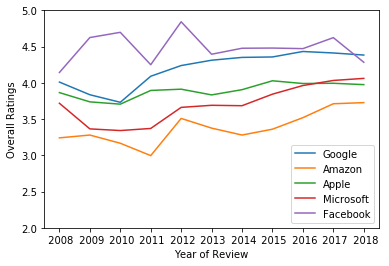

In [51]:
plt.plot(google_mean, label='Google')
plt.plot(amazon_mean, label='Amazon')
plt.plot(apple_mean, label='Apple')
plt.plot(microsoft_mean, label='Microsoft')
plt.plot(facebook_mean, label='Facebook')
plt.legend()
plt.yticks(np.arange(2, 5.5, step=0.5))
plt.ylabel('Overall Ratings')
plt.xlabel('Year of Review')

Text(0.5, 0, 'Year')

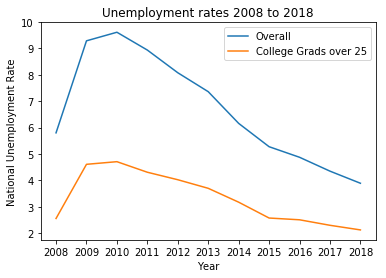

In [50]:
plt.plot(natl_mean, label='Overall')
plt.plot(over25_mean, label='College Grads over 25')
plt.legend()
plt.title('Unemployment rates 2008 to 2018')
plt.xticks(np.arange(2008,2019, step=1))
plt.ylabel('National Unemployment Rate')
plt.xlabel('Year')

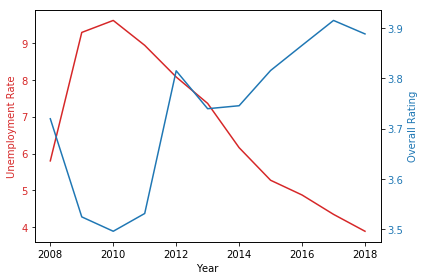

In [59]:
years=[2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018]
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('Unemployment Rate', color=color)
ax1.plot(years,natl_mean, color=color)
ax1.tick_params(axis='y',labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Overall Rating', color=color)  # we already handled the x-label with ax1
ax2.plot(years, by_year['overall-ratings'], color=color)
ax2.tick_params(axis='y',labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [72]:
test_reviews=reviews
test_reviews['dates']=test_reviews['dates'].str.strip()
test_reviews['Month'], test_reviews['Day'] = test_reviews['Date'].str.split(' ', 1).str
test_reviews.head()

,company,location,dates,job-title,summary,pros,cons,advice-to-mgmt,overall-ratings,work-balance-stars,culture-values-stars,carrer-opportunities-stars,comp-benefit-stars,senior-mangemnet-stars,helpful-count,link,Date,Year,Month,Day
index,,,,,,,,,,,,,,,,,,,,
1,google,none,"Dec 11, 2018",Current Employee - Anonymous Employee,Best Company to work for,People are smart and friendly,Bureaucracy is slowing things down,none,5,4,5,5,4,5,0,https://www.glassdoor.com/Reviews/Google-Revie...,Dec 11,2018,Dec,11
2,google,"Mountain View, CA","Jun 21, 2013",Former Employee - Program Manager,"Moving at the speed of light, burn out is inev...","1) Food, food, food. 15+ cafes on main campus ...",1) Work/life balance. What balance? All those ...,1) Don't dismiss emotional intelligence and ad...,4,2,3,3,5,3,2094,https://www.glassdoor.com/Reviews/Google-Revie...,Jun 21,2013,Jun,21
3,google,"New York, NY","May 10, 2014",Current Employee - Software Engineer III,Great balance between big-company security and...,"* If you're a software engineer, you're among ...","* It *is* becoming larger, and with it comes g...",Keep the focus on the user. Everything else wi...,5,5,4,5,5,4,949,https://www.glassdoor.com/Reviews/Google-Revie...,May 10,2014,May,10
4,google,"Mountain View, CA","Feb 8, 2015",Current Employee - Anonymous Employee,The best place I've worked and also the most d...,You can't find a more well-regarded company th...,I live in SF so the commute can take between 1...,Keep on NOT micromanaging - that is a huge ben...,5,2,5,5,4,5,498,https://www.glassdoor.com/Reviews/Google-Revie...,Feb 8,2015,Feb,8
5,google,"Los Angeles, CA","Jul 19, 2018",Former Employee - Software Engineer,"Unique, one of a kind dream job",Google is a world of its own. At every other c...,"If you don't work in MTV (HQ), you will be giv...",Promote managers into management for their man...,5,5,5,5,5,5,49,https://www.glassdoor.com/Reviews/Google-Revie...,Jul 19,2018,Jul,19


In [90]:
print(test_reviews['dates'])

index
1        Dec 11, 2018
2        Jun 21, 2013
3        May 10, 2014
4         Feb 8, 2015
5        Jul 19, 2018
6         Dec 9, 2018
7        Dec 11, 2018
8        Dec 11, 2018
9        Dec 10, 2018
10        Dec 9, 2018
11        Dec 8, 2018
12        Dec 8, 2018
13        Dec 4, 2018
14        Dec 3, 2018
15        Dec 6, 2018
16        Dec 6, 2018
17       Nov 29, 2018
18        Dec 2, 2018
19        Dec 1, 2018
20        Dec 3, 2018
21       Nov 26, 2018
22        Dec 2, 2018
23        Dec 1, 2018
24       Nov 30, 2018
25       Nov 29, 2018
26       Nov 29, 2018
27       Nov 28, 2018
28       Nov 17, 2018
29       Nov 27, 2018
30       Nov 20, 2018
             ...     
67500    Jan 13, 2011
67501    Jan 11, 2011
67502    Dec 26, 2010
67503     Jan 9, 2011
67504     Jan 7, 2011
67505     Jan 6, 2011
67506     Jan 6, 2011
67507     Jan 4, 2011
67508     Jan 3, 2011
67509     Jan 4, 2011
67510     Jan 4, 2011
67511     Jan 4, 2011
67512     Jan 1, 2011
67513     Jan 2, 2011
6751

In [94]:
# import calendar
# test_reviews['Month'] = test_reviews['Month'].apply(lambda x: calendar.month_abbr[x])
from datetime import datetime
test_reviews['dates']=pd.to_datetime(test_reviews['dates'],format=" %b %d, %Y ")
test_reviews

ValueError: time data 'Dec 11, 2018' does not match format ' %b %d, %Y ' (match)

In [68]:
test_reviews.groupby(['Year','Month']).mean()['overall-ratings']

Year   Month
 2008  Apr      4.186667
       Aug      3.704545
       Dec      3.720721
       Feb      4.636364
       Jan      5.000000
       Jul      3.606383
       Jun      3.640367
       Mar      4.444444
       May      4.108911
       Nov      3.544118
       Oct      3.673913
       Sep      3.541667
 2009  Apr      3.626374
       Aug      3.575000
       Dec      3.301587
       Feb      3.787234
       Jan      3.673469
       Jul      3.389831
       Jun      3.839286
       Mar      3.329268
       May      3.698630
       Nov      3.425926
       Oct      3.382353
       Sep      3.271429
 2010  Apr      3.573529
       Aug      3.464789
       Dec      3.458333
       Feb      3.597015
       Jan      3.566265
       Jul      3.465909
                  ...   
 2016  Jun      3.758282
       Mar      3.851351
       May      3.844470
       Nov      3.889009
       Oct      3.864912
       Sep      3.856637
 2017  Apr      3.874372
       Aug      3.821495
       Dec  